Running Missing Data Tasks...
Number of records with missing emails: 2
Percentage of missing transaction dates: 50.00%
Number of employees with missing department info: 2

Running Duplicate Data Tasks...
Number of duplicate records: 1
Duplicate suppliers:
   supplier_id supplier_name
2          103      ABC Corp
Duplicate products:
   product_id product_name
2         102    Product B

Running Inconsistent Formatting Tasks...
Rows with inconsistent date formats:
         date parsed_date
1  01/02/2023         NaT
3  04/05/2023         NaT
Rows with inconsistent phone formats:
Empty DataFrame
Columns: [name, phone, valid_phone]
Index: []
Rows with inconsistent state abbreviations:
      address       state
1  456 Oak St  California

Running Data Drift Tasks...


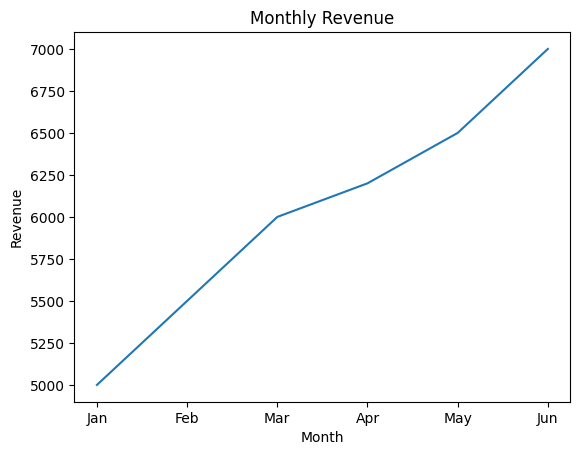

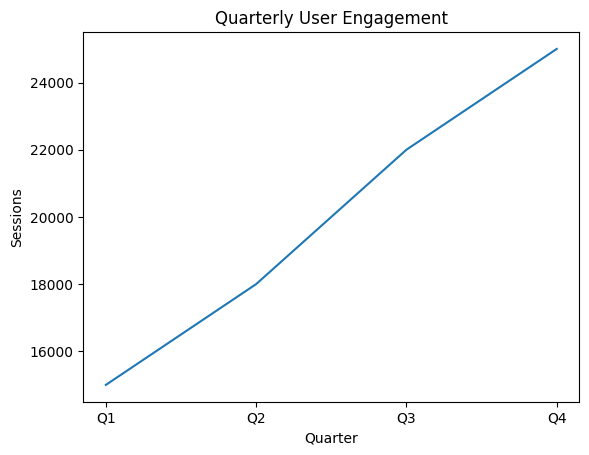

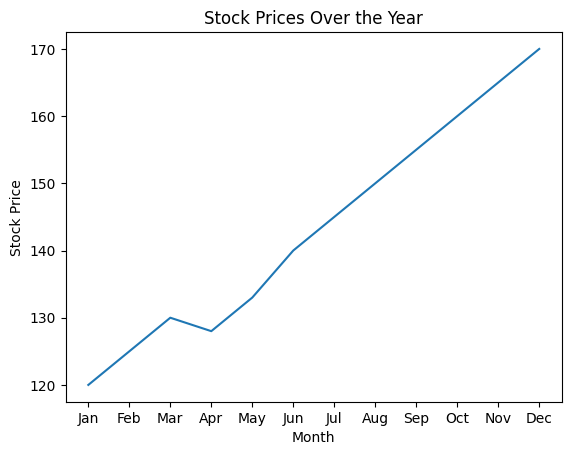

In [1]:
# Common Data Errors Examples

# 1. Missing Data:
# Task 1: Review a dataset where some customer emails are missing. Identify how
# many records are incomplete.
# Task 2: Examine a sales dataset with missing transaction dates and determine the
# percentage of missing data.
# Task 3: Identify missing department information in an employee registry.






# 2. Duplicate Data:
# Task 1: Analyze a customer dataset with duplicate entries and count the number of
# duplicates.
# Task 2: Review supplier data and identify any repeated supplier names.
# Task 3: Examine a product inventory list for duplicates in product IDs.






# 3. Inconsistent Formatting:
# Task 1: Spot inconsistencies in date formats (e.g., DD/MM/YYYY vs. MM/DD/YYYY)
# in a dataset.
# Task 2: Identify phone numbers with varying formats in a contact list.
# Task 3: Review address data for discrepancies in state abbreviations (e.g., CA vs.
# Calif.).





# 4. Data Drift:
# Task 1: Compare monthly revenues over six months to identify data drift.
# Task 2: Analyze user engagement metrics from a web application over different
# quarters.
# Task 3: Review a stock price dataset to detect any anomalies over a year.

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from scipy.stats import zscore

# =======================
# Task 1: Missing Data
# =======================

# Task 1.1: Review a dataset where some customer emails are missing. Identify how many records are incomplete.
def missing_data_task1():
    data = {'customer_id': [1, 2, 3, 4],
            'email': ['customer1@email.com', None, 'customer3@email.com', None]}
    df = pd.DataFrame(data)
    missing_emails = df['email'].isnull().sum()
    print(f"Number of records with missing emails: {missing_emails}")

# Task 1.2: Examine a sales dataset with missing transaction dates and determine the percentage of missing data.
def missing_data_task2():
    sales_data = {'transaction_id': [101, 102, 103, 104],
                  'transaction_date': ['2023-01-01', None, '2023-01-03', None]}
    df_sales = pd.DataFrame(sales_data)
    missing_percentage = df_sales['transaction_date'].isnull().mean() * 100
    print(f"Percentage of missing transaction dates: {missing_percentage:.2f}%")

# Task 1.3: Identify missing department information in an employee registry.
def missing_data_task3():
    employee_data = {'employee_id': [1, 2, 3, 4],
                     'department': ['HR', None, 'IT', None]}
    df_employees = pd.DataFrame(employee_data)
    missing_departments = df_employees['department'].isnull().sum()
    print(f"Number of employees with missing department info: {missing_departments}")

# =======================
# Task 2: Duplicate Data
# =======================

# Task 2.1: Analyze a customer dataset with duplicate entries and count the number of duplicates.
def duplicate_data_task1():
    customer_data = {'customer_id': [1, 2, 2, 4],
                     'email': ['customer1@email.com', 'customer2@email.com', 'customer2@email.com', 'customer4@email.com']}
    df_customer = pd.DataFrame(customer_data)
    duplicates_count = df_customer.duplicated().sum()
    print(f"Number of duplicate records: {duplicates_count}")

# Task 2.2: Review supplier data and identify any repeated supplier names.
def duplicate_data_task2():
    supplier_data = {'supplier_id': [101, 102, 103, 104],
                     'supplier_name': ['ABC Corp', 'XYZ Ltd', 'ABC Corp', 'LMN Inc']}
    df_suppliers = pd.DataFrame(supplier_data)
    duplicate_suppliers = df_suppliers[df_suppliers.duplicated(subset='supplier_name')]
    print(f"Duplicate suppliers:\n{duplicate_suppliers}")

# Task 2.3: Examine a product inventory list for duplicates in product IDs.
def duplicate_data_task3():
    product_data = {'product_id': [101, 102, 102, 104],
                    'product_name': ['Product A', 'Product B', 'Product B', 'Product D']}
    df_products = pd.DataFrame(product_data)
    duplicate_products = df_products[df_products.duplicated(subset='product_id')]
    print(f"Duplicate products:\n{duplicate_products}")

# =======================
# Task 3: Inconsistent Formatting
# =======================

# Task 3.1: Spot inconsistencies in date formats (e.g., DD/MM/YYYY vs. MM/DD/YYYY) in a dataset.
def inconsistent_formatting_task1():
    data = {'date': ['2023-01-01', '01/02/2023', '2023-03-03', '04/05/2023']}
    df_dates = pd.DataFrame(data)
    df_dates['parsed_date'] = pd.to_datetime(df_dates['date'], errors='coerce', dayfirst=False)
    invalid_dates = df_dates[df_dates['parsed_date'].isnull()]
    print(f"Rows with inconsistent date formats:\n{invalid_dates}")

# Task 3.2: Identify phone numbers with varying formats in a contact list.
def inconsistent_formatting_task2():
    contact_data = {'name': ['John', 'Jane', 'Alice'],
                    'phone': ['123-456-7890', '123.456.7890', '(123) 456-7890']}
    df_contacts = pd.DataFrame(contact_data)
    phone_pattern = r'^\(?\d{3}\)?[-.\s]?\d{3}[-.\s]?\d{4}$'
    df_contacts['valid_phone'] = df_contacts['phone'].apply(lambda x: bool(re.match(phone_pattern, x)))
    inconsistent_phones = df_contacts[~df_contacts['valid_phone']]
    print(f"Rows with inconsistent phone formats:\n{inconsistent_phones}")

# Task 3.3: Review address data for discrepancies in state abbreviations (e.g., CA vs. Calif.).
def inconsistent_formatting_task3():
    address_data = {'address': ['123 Main St', '456 Oak St', '789 Pine St'],
                    'state': ['CA', 'California', 'CA']}
    df_address = pd.DataFrame(address_data)
    valid_states = ['CA', 'NY', 'TX', 'FL', 'IL']
    inconsistent_states = df_address[~df_address['state'].isin(valid_states)]
    print(f"Rows with inconsistent state abbreviations:\n{inconsistent_states}")

# =======================
# Task 4: Data Drift
# =======================

# Task 4.1: Compare monthly revenues over six months to identify data drift.
def data_drift_task1():
    monthly_revenue = {'month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'],
                       'revenue': [5000, 5500, 6000, 6200, 6500, 7000]}
    df_revenue = pd.DataFrame(monthly_revenue)
    plt.plot(df_revenue['month'], df_revenue['revenue'])
    plt.title('Monthly Revenue')
    plt.xlabel('Month')
    plt.ylabel('Revenue')
    plt.show()

# Task 4.2: Analyze user engagement metrics from a web application over different quarters.
def data_drift_task2():
    quarterly_engagement = {'quarter': ['Q1', 'Q2', 'Q3', 'Q4'],
                            'sessions': [15000, 18000, 22000, 25000]}
    df_engagement = pd.DataFrame(quarterly_engagement)
    plt.plot(df_engagement['quarter'], df_engagement['sessions'])
    plt.title('Quarterly User Engagement')
    plt.xlabel('Quarter')
    plt.ylabel('Sessions')
    plt.show()

# Task 4.3: Review a stock price dataset to detect any anomalies over a year.
def data_drift_task3():
    stock_data = {'month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
                  'stock_price': [120, 125, 130, 128, 133, 140, 145, 150, 155, 160, 165, 170]}
    df_stock = pd.DataFrame(stock_data)
    plt.plot(df_stock['month'], df_stock['stock_price'])
    plt.title('Stock Prices Over the Year')
    plt.xlabel('Month')
    plt.ylabel('Stock Price')
    plt.show()

# =======================
# Run All Tasks
# =======================

def run_all_tasks():
    print("Running Missing Data Tasks...")
    missing_data_task1()
    missing_data_task2()
    missing_data_task3()
    
    print("\nRunning Duplicate Data Tasks...")
    duplicate_data_task1()
    duplicate_data_task2()
    duplicate_data_task3()

    print("\nRunning Inconsistent Formatting Tasks...")
    inconsistent_formatting_task1()
    inconsistent_formatting_task2()
    inconsistent_formatting_task3()

    print("\nRunning Data Drift Tasks...")
    data_drift_task1()
    data_drift_task2()
    data_drift_task3()

run_all_tasks()


